<a href="https://colab.research.google.com/github/smiyawaki0820/preprocess/blob/main/visions/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tesseract OCR
Google が公開したオープンソースの文字認識エンジン
- https://gitlab.gnome.org/World/OpenPaperwork/pyocr
- [参考](https://mstn2050.github.io/blogs/contents/ocr_with_python_and_tesseract.html)

In [44]:
%%bash
pip install pyocr
sudo apt install tesseract-ocr libtesseract-dev tesseract-ocr-jpn

Reading package lists...
Building dependency tree...
Reading state information...
libtesseract-dev is already the newest version (4.00~git2288-10f4998a-2).
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following NEW packages will be installed:
  tesseract-ocr-jpn
0 upgraded, 1 newly installed, 0 to remove and 31 not upgraded.
Need to get 1,389 kB of archives.
After this operation, 2,486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-jpn all 4.00~git24-0e00fe6-1.2 [1,389 kB]
Fetched 1,389 kB in 1s (1,711 kB/s)
Selecting previously unselected package tesseract-ocr-jpn.
(Reading database ... 161141 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-jpn_4.00~git24-0e00fe6-1.2_all.deb ...
Unpacking tesseract-ocr-jpn (4.00~git24-0e00fe6-1.2) ...
Setting up tesseract-ocr-jpn (4.00~git24-0e00fe6-1.2) ...




debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


In [48]:
%%bash
mkdir -p images
wget -c https://mstn2050.github.io/blogs/images/ocr_with_python_and_tesseract/target.png -O images/sample.png

--2021-04-09 19:45:32--  https://mstn2050.github.io/blogs/images/ocr_with_python_and_tesseract/target.png
Resolving mstn2050.github.io (mstn2050.github.io)... 185.199.108.153, 185.199.111.153, 185.199.110.153, ...
Connecting to mstn2050.github.io (mstn2050.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [62]:
import matplotlib.pyplot as plt
from PIL import Image
import pyocr
import cv2
from google.colab.patches import cv2_imshow

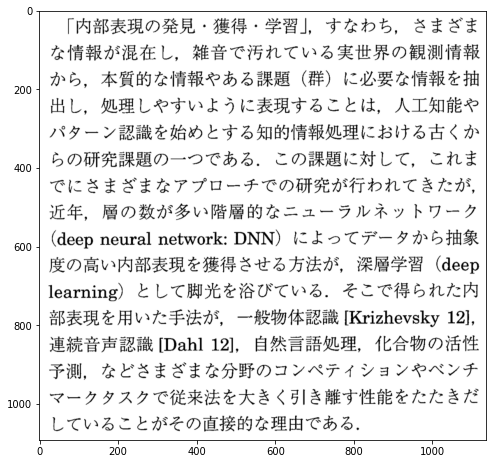

In [56]:
%matplotlib inline

# sample image
target = 'images/sample.png'
image = Image.open(target)

plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.show()

## tesseract_layout

- OSD (Orientation and Script Detection) : 向きと文字検出

|No.|tesseract_layout|
|:---:|:---|
|0| OSD のみ|
|1|自動ページ分割 w/ OSD|
|2|自動ページ分割 w/o OSD|
|3|完全自動のページ分割 w/o OSD (Default)|
|4|可変サイズのテキストが一列に並んでいると仮定|
|5|垂直方向に整列した一つの均一なテキストブロックを仮定|
|6|一つの均一なテキストブロックを仮定|
|7|画像を一つのテキスト行として扱う|
|8|画像を一つの単語として扱う|
|9|画像を円内の単一の単語として扱う|
|10|画像を一つの文字として扱う|

In [58]:
# OCR エンジン取得
tools = pyocr.get_available_tools()
tool = tools[0]

# 使用する画像を指定してOCRを実行
text = tool.image_to_string(
     Image.open(target),
    lang="jpn",
    builder=pyocr.builders.TextBuilder(tesseract_layout=6)
)

print(text)

「内部表現の発見・獲得・学習」 すなわち, さまざま
な情報が混在し, 雑音で汚れている実世界の観測情報
から, 本質的な情報やある課題 (群) に必要な情報を抽
出し, 処理しやすいように表現することは, 人工知能や
パターン認識を始めとする知的情報処理における古くか
らの研究課題の一つである. この課題に対して, これま
でにさまざまなアプローチでの研究が行われてきたが,
近年, 層の数が多い階層的なニューラルネットワーク
(deep neural network: DNN) によってデータから抽象
度の高い内部表現を獲得させる方法が, 深層学習 (deep
learning) として脚光を浴びている. そこで得られた内
部表現を用いた手法が, 一般物体認識 [Krizhevsky 121,
連続音声認識 [Dahl 12], 自然言語処理, 化合物の活性
予測, などさまざまな分野のコンペティションやベンチ
マークタスクで従来法を大きく引き離す性能をたたきだ
していることがその直接的な理由である.


「 内 部 表現 の 発見 ・ 獲 得 ・ 学 習 」 すなわち , さま ざま な 情報 が 混在 し , 雑音 で 汚れ て いる 実 世界 の 観測 情報 か ら , 本 質 的 な 情報 や ある 課題 ( 群 ) に 必要 な 情報 を 抽 出し , 処理 し や すい よう に 表現 する こと は , 人 工 知能 や パタ ー ン 認識 を 始め と する 知 的 情報 処理 に お ける 古く か ら の 研究 課題 の 一 つ で ある . この 課題 に 対し て , これ ま で に さま ざま な アプ ロー チ で の 研究 が 行わ れ て きた が , 近年 , 層 の 数 が 多い 階層 的 な ニュ ー ラ ルネ ットワーク (deep neural network: DNN) に よっ て デー タ か ら 抽 象 度 の 高い 内 部 表現 を 獲得 させ る 方 法 が , 深層 学習 (deep learning) と し て 脚光 を 浴び て いる . そこ で 得 ら れ た 内 部 表現 を 用 いた 手法 が , 一 般 物体 認識 [Krizhevsky 121, 連続 音声 認識 [Dahl 12], 自然 言語 処理 , 化合 物 の 活性 予測 , な ど さ ま ざま な 分 野 の コン ペティ ショ ン や ベン チ マー クタ スク で 従来 法 を 大 きく 引き 離す 性 能 を た た きだ し て いる こと が その 直接 的 な 理由 で ある .                                


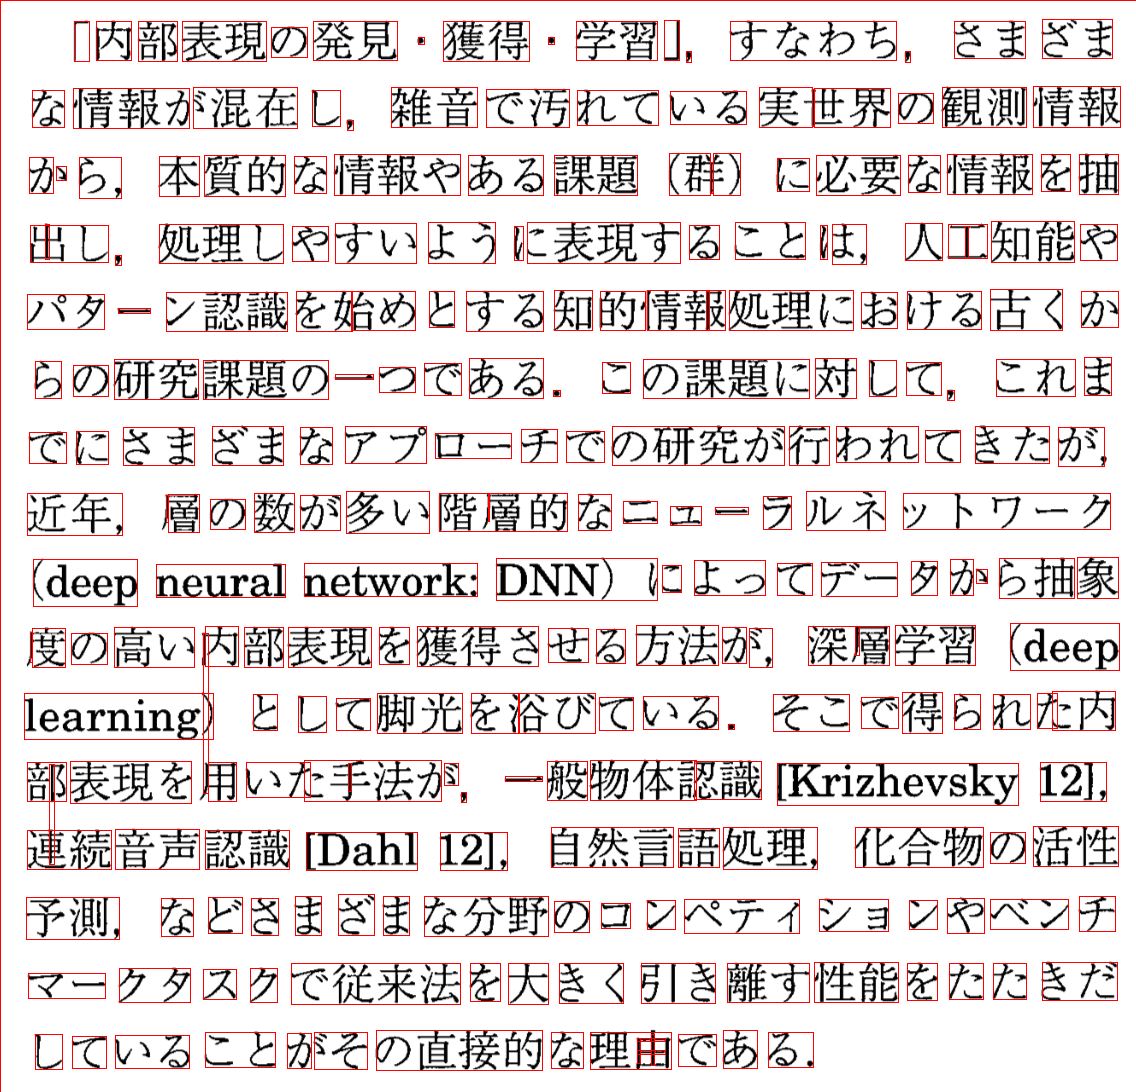

In [69]:
text = tool.image_to_string(
    Image.open(target),
    lang='jpn',
    builder=pyocr.builders.WordBoxBuilder(tesseract_layout=6)
)
print(' '.join(map(lambda x: x.content, text)))

image = cv2.imread(target)
for token in text:
    #print(res.position)
    #print(res.content)
    cv2.rectangle(image, token.position[0], token.position[1], (0, 0, 255), 1)

cv2_imshow(image)
key = cv2.waitKey(0)
if key & 0xFF == ord('q'):
    cv2.destroyAllWindows()

「 内 部 表現 の 発見 ・ 獲 得 ・ 学 習 」 すなわち , さま ざま な 情報 が 混在 し , 雑音 で 汚れ て いる 実 世界 の 観測 情報 か ら , 本 質 的 な 情報 や ある 課題 ( 群 ) に 必要 な 情報 を 抽 出し , 処理 し や すい よう に 表現 する こと は , 人 工 知能 や パタ ー ン 認識 を 始め と する 知 的 情報 処理 に お ける 古く か ら の 研究 課題 の 一 つ で ある . この 課題 に 対し て , これ ま で に さま ざま な アプ ロー チ で の 研究 が 行わ れ て きた が , 近年 , 層 の 数 が 多い 階層 的 な ニュ ー ラ ルネ ットワーク (deep neural network: DNN) に よっ て デー タ か ら 抽 象 度 の 高い 内 部 表現 を 獲得 させ る 方 法 が , 深層 学習 (deep learning) と し て 脚光 を 浴び て いる . そこ で 得 ら れ た 内 部 表現 を 用 いた 手法 が , 一 般 物体 認識 [Krizhevsky 121, 連続 音声 認識 [Dahl 12], 自然 言語 処理 , 化合 物 の 活性 予測 , な ど さ ま ざま な 分 野 の コン ペティ ショ ン や ベン チ マー クタ スク で 従来 法 を 大 きく 引き 離す 性 能 を た た きだ し て いる こと が その 直接 的 な 理由 で ある .                


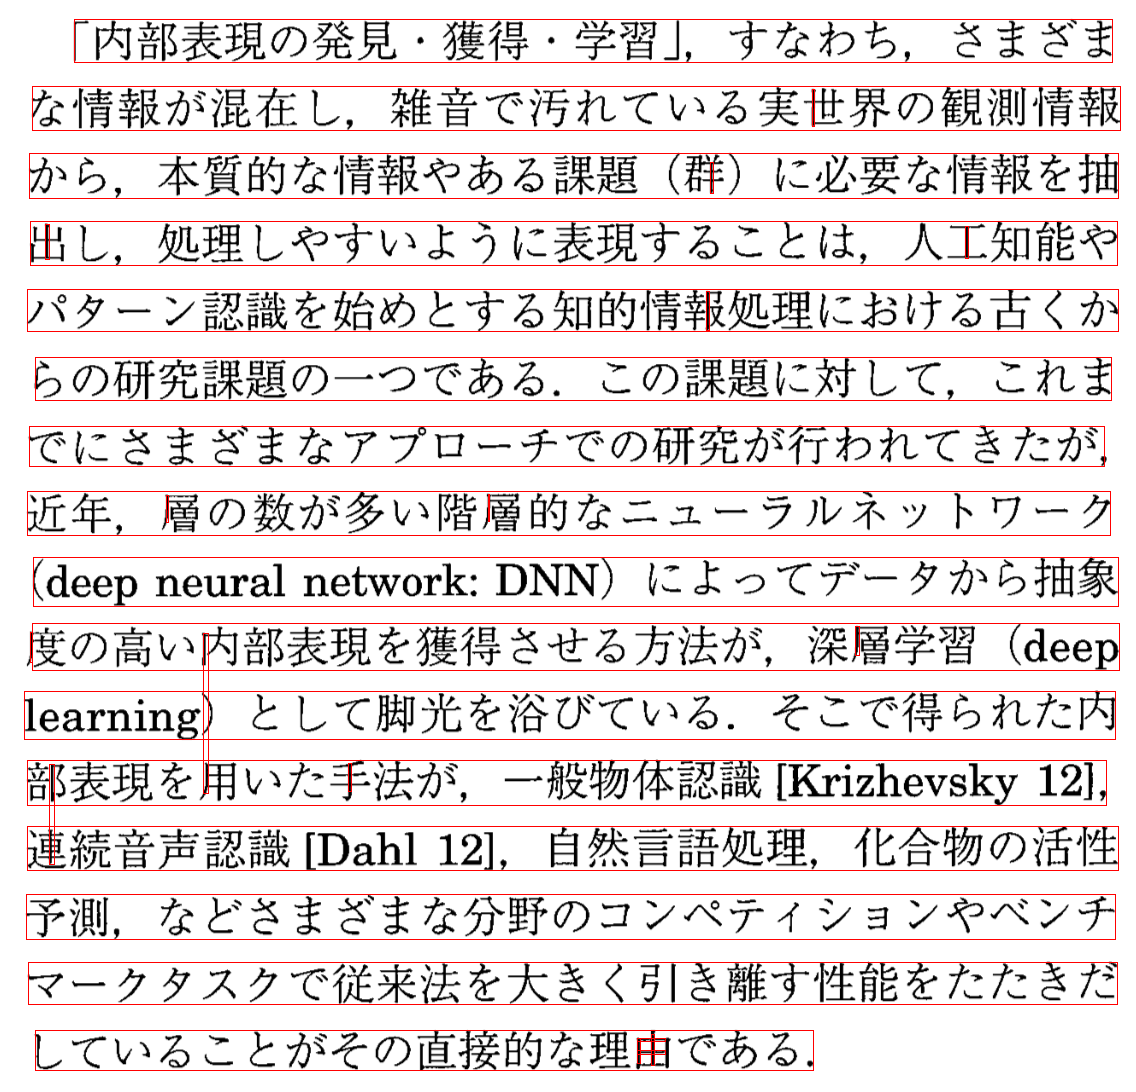

In [70]:
text = tool.image_to_string(
    Image.open(target),
    lang='jpn',
    builder=pyocr.builders.LineBoxBuilder(tesseract_layout=6)
)
print(' '.join(map(lambda x: x.content, text)))

image = cv2.imread(target)
for token in text:
    #print(res.position)
    #print(res.content)
    cv2.rectangle(image, token.position[0], token.position[1], (0, 0, 255), 1)

cv2_imshow(image)
key = cv2.waitKey(0)
if key & 0xFF == ord('q'):
    cv2.destroyAllWindows()